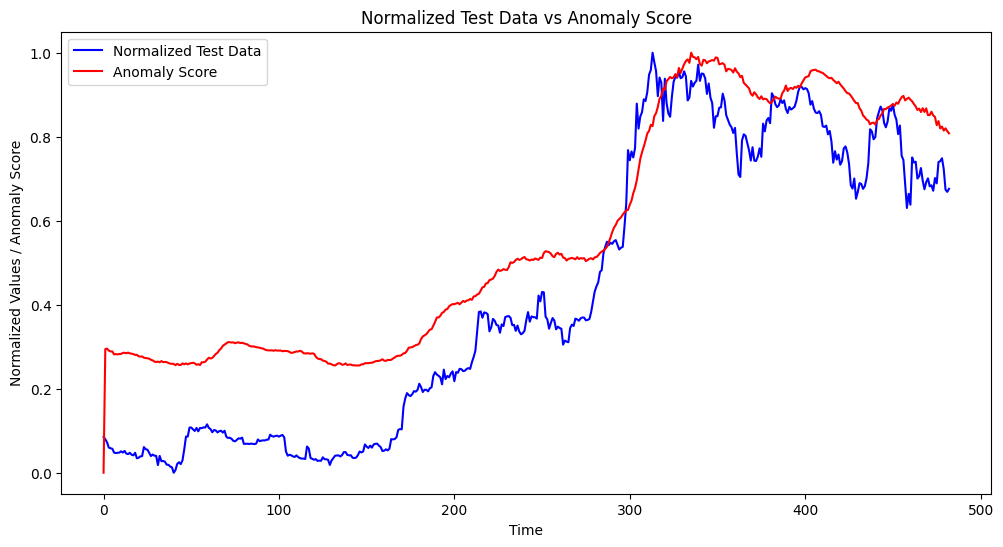

In [22]:

import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 생성 (값을 -1과 1 사이로 정규화)
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaler2 = MinMaxScaler(feature_range=(0, 1))

df_price = pd.read_csv('bitdata.csv')
anomaly_scores = pd.read_csv('anomaly_score.csv', header=None)
# test_data 마지막 부분 추출
test_data = df_price['Close'][-len(anomaly_scores):]

# 데이터 정규화 (reshape(-1, 1)을 통해 2D 배열로 변환)
test_data_normalized = scaler1.fit_transform(test_data.values.reshape(-1, 1))
anomaly_scores = scaler2.fit_transform(anomaly_scores[1].values.reshape(-1, 1))

# 다시 1D로 변환
test_data_normalized = test_data_normalized.flatten()
anomaly_scores = anomaly_scores.flatten()


# test_data의 길이에 맞추어 정규화된 test data 자르기

# Plot 생성
plt.figure(figsize=(12, 6))

# 테스트 데이터 플롯
plt.plot(test_data_normalized, label='Normalized Test Data', color='blue')

# Anomaly Score 플롯
plt.plot(anomaly_scores, label='Anomaly Score', color='red')

# 그래프 제목 및 축 설정
plt.title('Normalized Test Data vs Anomaly Score')
plt.xlabel('Time')
plt.ylabel('Normalized Values / Anomaly Score')
plt.legend()

# 그래프 보여주기
plt.show()